In [248]:
import pandas as pd
import numpy as np
import scipy as sp
import miRNET, miRNET_enrichment
Targets = miRNET.Targets(path_to_miRTarBase='./baseData/hsa_miRTarBase.csv')
import warnings
import collections
from matplotlib import pyplot as plt
import random
from scipy.stats import chi2_contingency
import json
import networkx as nx

In [241]:
miR_targets = Targets.get_targets('miR-1-')
tis_gene_set = miRNET.tissue_selector(ans=0, tissue_id=23)
MirNet = miRNET.MainNet() #Load String db and create gene-gene interaction network
MirNet.get_LCC() #get the largest connected component from the network
MirNet.select_nodes(miR_targets) # select the part of LCC containing only the miRNA target genes
MirNet.select_nodes(tis_gene_set) # select the part of LCC containing only the tissue target genes
kne = miRNET.KeyNodesExtractor(MirNet) # c
kne.extraction() #key nodes extraction

enrich_res = miRNET_enrichment.reactome_enrichment(down_dict['miR-1-'], species='Homo sapiens')
enrich_res = miRNET_enrichment.reac_pars(enrich_res)
G_enrich = miRNET_enrichment.get_net(enrich_res) #граф сигнальных путей
reactome_df = miRNET_enrichment.dendro_reactome_to_pandas(enrich_res, G_enrich)

I found a miRNA with name: hsa-miR-1-3p hsa-miR-1-5p
and  962 unique targets
Gene universe is...
heart muscle was used
your tissue is  heart muscle  number of genes:  7944


In [242]:
reactome_df.to_csv('./miR_1_enrich.csv')

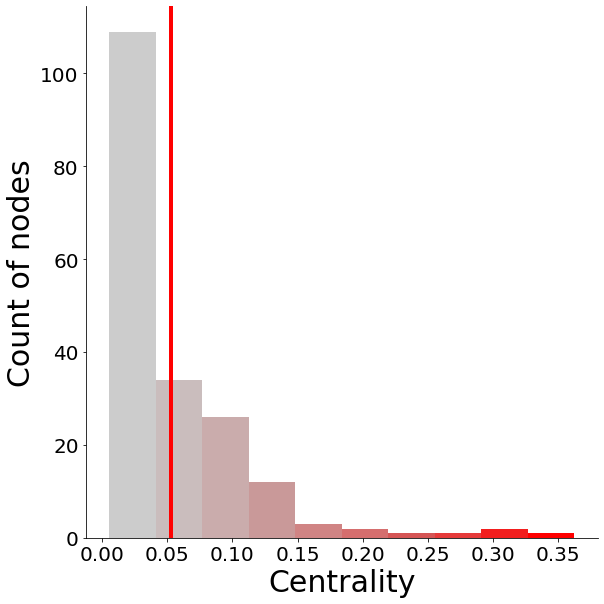

In [9]:
pltots = miRNET.Plots(MirNet, kne, 'miR-1')
#pltots.graph_to_cytoscape()
pltots.central_distr()

In [243]:
miR_targets = Targets.get_targets('miR-21-')
tis_gene_set = miRNET.tissue_selector(ans=0, tissue_id=23)
MirNet = miRNET.MainNet() #Load String db and create gene-gene interaction network
MirNet.get_LCC() #get the largest connected component from the network
MirNet.select_nodes(miR_targets) # select the part of LCC containing only the miRNA target genes
MirNet.select_nodes(tis_gene_set) # select the part of LCC containing only the tissue target genes
kne = miRNET.KeyNodesExtractor(MirNet) # c
kne.extraction() #key nodes extraction

enrich_res = miRNET_enrichment.reactome_enrichment(down_dict['miR-21-'], species='Homo sapiens')
enrich_res = miRNET_enrichment.reac_pars(enrich_res)
G_enrich = miRNET_enrichment.get_net(enrich_res) #граф сигнальных путей
reactome_df = miRNET_enrichment.dendro_reactome_to_pandas(enrich_res, G_enrich)

I found a miRNA with name: hsa-miR-21-5p hsa-miR-21-3p
and  686 unique targets
Gene universe is...
heart muscle was used
your tissue is  heart muscle  number of genes:  7944


In [244]:
reactome_df.to_csv('./miR_21_enrich.csv')

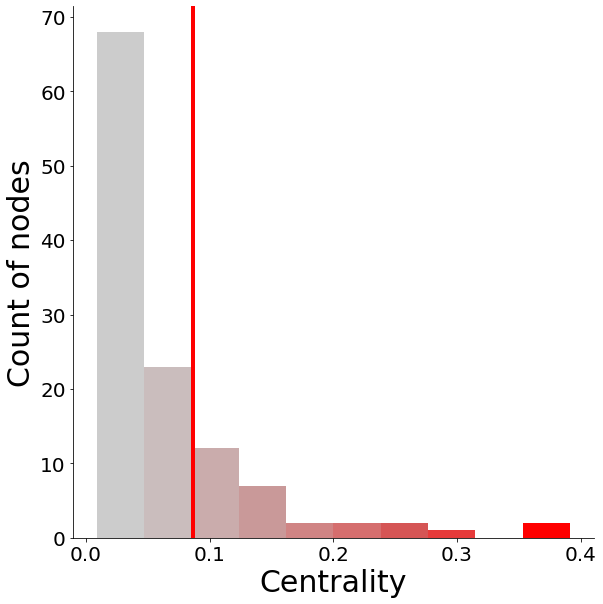

In [11]:
pltots = miRNET.Plots(MirNet, kne, 'miR-21')
#pltots.graph_to_cytoscape()
pltots.central_distr()